In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
df1 = pd.read_csv(r"data\raw\aug_test.csv")
df2 = pd.read_csv(r"data\raw\aug_train.csv")
df3 = pd.read_csv(r"data\raw\sample_submission.csv")

In [40]:
#merge the tree datasets
df = pd.concat([df1, df2], axis=0)
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,57782,Female,34,1,39.0,1,1-2 Year,No,38244.0,124.0,146,NaN
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,37577.0,122.0,109,NaN
2,117823,Male,39,1,28.0,1,1-2 Year,No,24578.0,26.0,63,NaN
3,213992,Male,28,1,50.0,1,1-2 Year,No,40507.0,8.0,129,NaN
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,36783.0,152.0,201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0.0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0.0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0.0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0.0


In [43]:
#replace Gender values with numbers (Male =1 and Female =0)
df["Gender"] = df.Gender.replace("Male", 1)
df["Gender"] = df.Gender.replace("Female", 2)

#replace vehicle_age values with numbers (<1 year = 1 , 1-2 year = 2 and >2 years = 3)
df["Vehicle_Age"] = df.Vehicle_Age.replace("< 1 Year", 1)
df["Vehicle_Age"] = df.Vehicle_Age.replace("1-2 Year", 2)
df["Vehicle_Age"] = df.Vehicle_Age.replace("> 2 Years", 3)

#replace vehicle_damage values with numbers (No = 0 and Yes = 1)
df["Vehicle_Damage"] = df.Vehicle_Damage.replace("No", 0)
df["Vehicle_Damage"] = df.Vehicle_Damage.replace("Yes", 1)

df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,57782,2,34,1,39.0,1,2,0,38244.0,124.0,146,NaN
1,286811,2,55,1,28.0,0,3,1,37577.0,122.0,109,NaN
2,117823,1,39,1,28.0,1,2,0,24578.0,26.0,63,NaN
3,213992,1,28,1,50.0,1,2,0,40507.0,8.0,129,NaN
4,324756,2,24,1,10.0,0,1,1,36783.0,152.0,201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,1,24,1,15.0,0,1,1,23938.0,152.0,105,0.0
382150,247064,1,27,1,28.0,1,1,0,336395.0,152.0,144,0.0
382151,165293,1,45,1,28.0,0,2,1,40443.0,26.0,187,0.0
382152,383241,2,28,1,28.0,1,1,0,25380.0,152.0,208,0.0


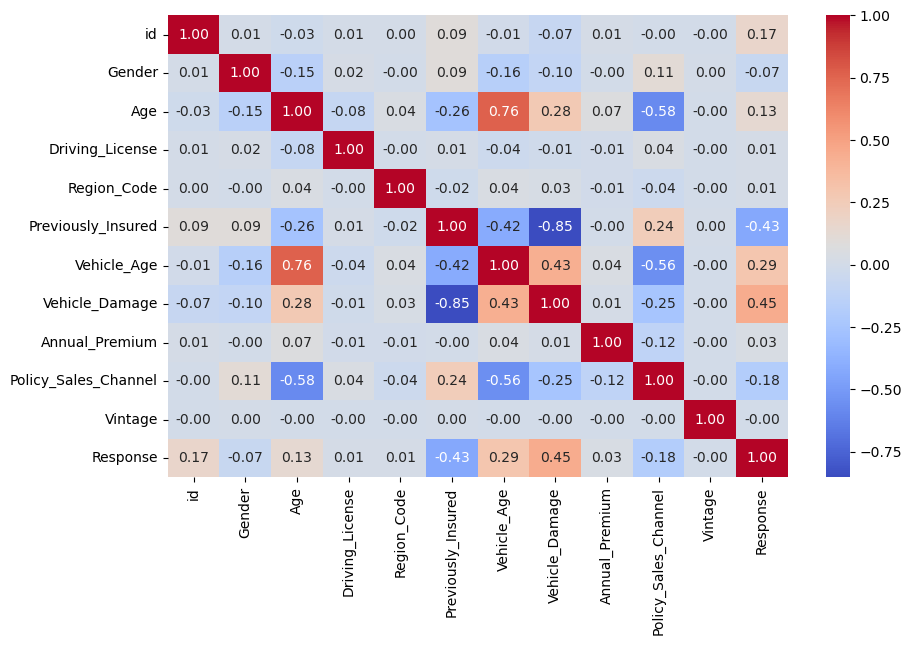

In [44]:
#Create a heatmap to visualize correlations between numerical variables.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Vehicle Age and Damage

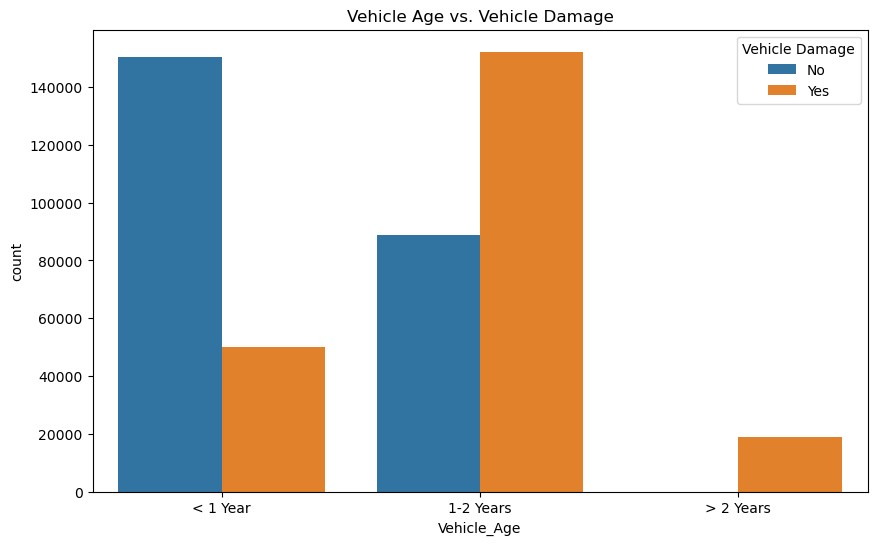

In [51]:
#Vehicle Age and Damage
plt.figure(figsize=(10,6))
sns.countplot(x='Vehicle_Age', hue='Vehicle_Damage', data=df)
plt.xticks(ticks=[0,1,2], labels=['< 1 Year', '1-2 Years', '> 2 Years'])
plt.title('Vehicle Age vs. Vehicle Damage')
plt.legend(title='Vehicle Damage', labels=['No', 'Yes'])
plt.show()

#Possible Conclusion:
#The plot shows that most vehicles with 1-2 years of age have been damaged, while
#vehicles with less than 1 year of age have not been damaged. This suggests that the age of the vehicle may be related to the likelihood of damage.

Distribution of age for customers who are interested and not interesested in vehicle insurance.

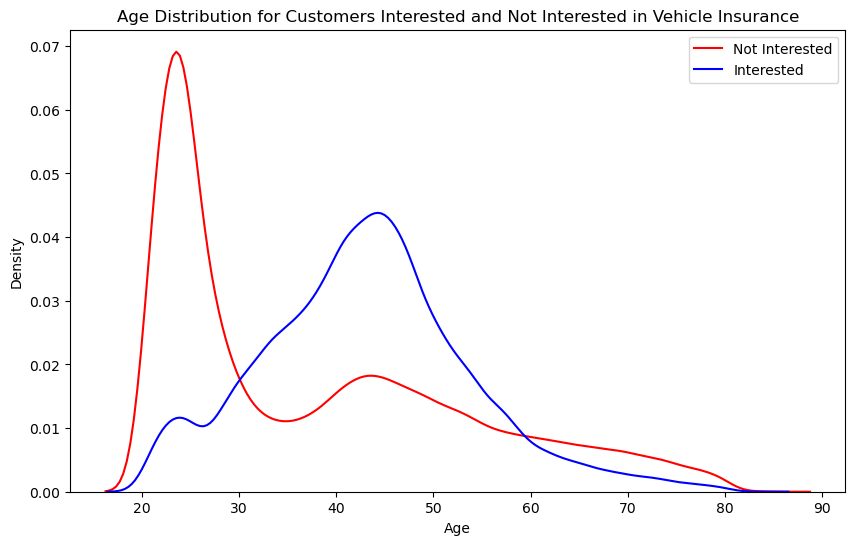

In [53]:
#Distribution of age for customers who are interested and not interesested in vehicle insurance.
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Response'] == 0]['Age'], color='red', label='Not Interested')
sns.kdeplot(df[df['Response'] == 1]['Age'], color='blue', label='Interested')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution for Customers Interested and Not Interested in Vehicle Insurance')
plt.legend()
plt.show()

#Possible Conclusion:
#Young Adults (20-30): More young adults are not interested in vehicle insurance compared to those who are interested.
#Middle-aged Adults (30-60): There is a higher interest in vehicle insurance, particularly around the age of 45, suggesting this age group sees more value in vehicle insurance.
#Older Adults (60+): Both interested and not interested densities decrease, with a slightly higher proportion of disinterest.

Distribution of gender for customers who are interested and not interesested in vehicle insurance.

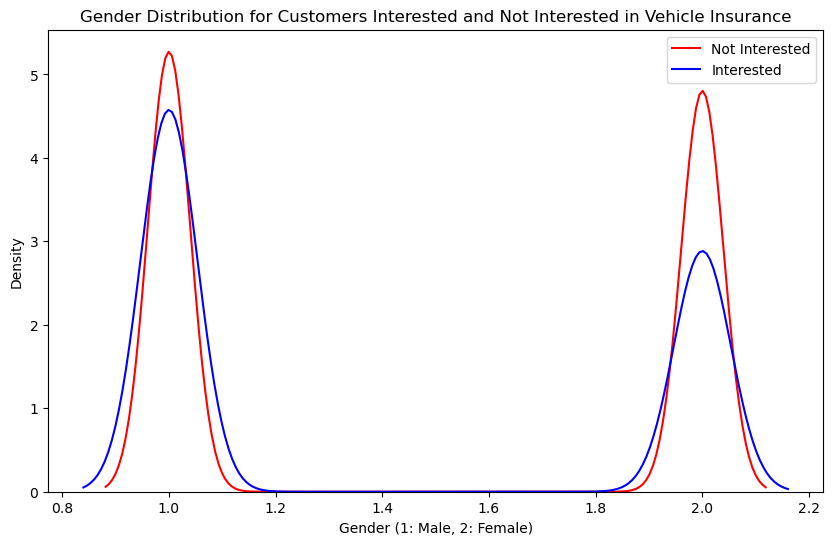

In [50]:
#Distribution of gender for customers who are interested and not interesested in vehicle insurance.
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Response'] == 0]['Gender'], color='red', label='Not Interested')
sns.kdeplot(df[df['Response'] == 1]['Gender'], color='blue', label='Interested')
plt.xlabel('Gender (1: Male, 2: Female)')
plt.ylabel('Density')
plt.title('Gender Distribution for Customers Interested and Not Interested in Vehicle Insurance')
plt.legend()
plt.show()

#Possible Conclusion: 
# In general, a greater proportion of customers in both genders are not interested in vehicle insurance.
#There is a higher proportion of Female customers who are interested in vehicle insurance compared

Distribution of damage for customers who are interested and not interesested in vehicle insurance.

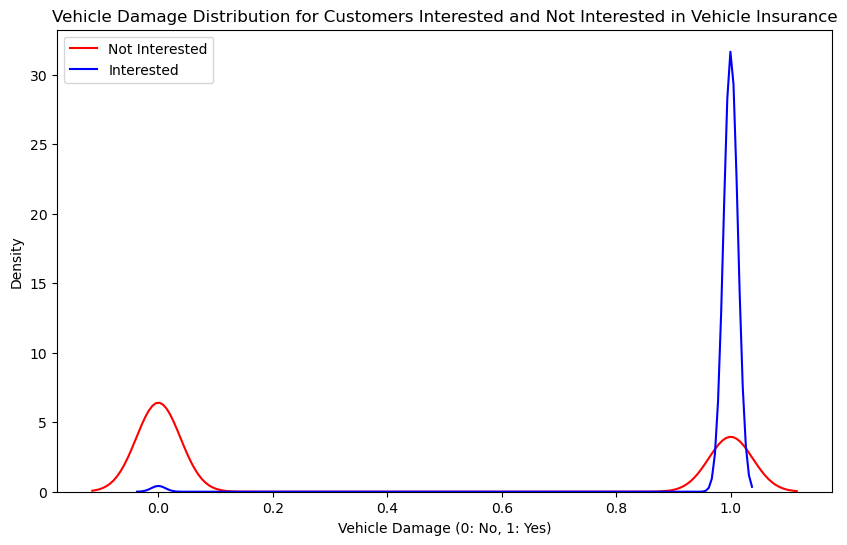

In [52]:
#Show the distribution of damage for customers who are interested  and not interesested in vehicle insurance.
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Response'] == 0]['Vehicle_Damage'], color='red', label='Not Interested')
sns.kdeplot(df[df['Response'] == 1]['Vehicle_Damage'], color='blue', label='Interested')
plt.xlabel('Vehicle Damage (0: No, 1: Yes)')
plt.ylabel('Density')
plt.title('Vehicle Damage Distribution for Customers Interested and Not Interested in Vehicle Insurance')
plt.legend()
plt.show()

#Possible Conclusion:
#Customers who have had vehicle damage are more likely to be interested in vehicle insurance.

Distribution of vehicle age for customers who are interested and not interesested in vehicle insurance.

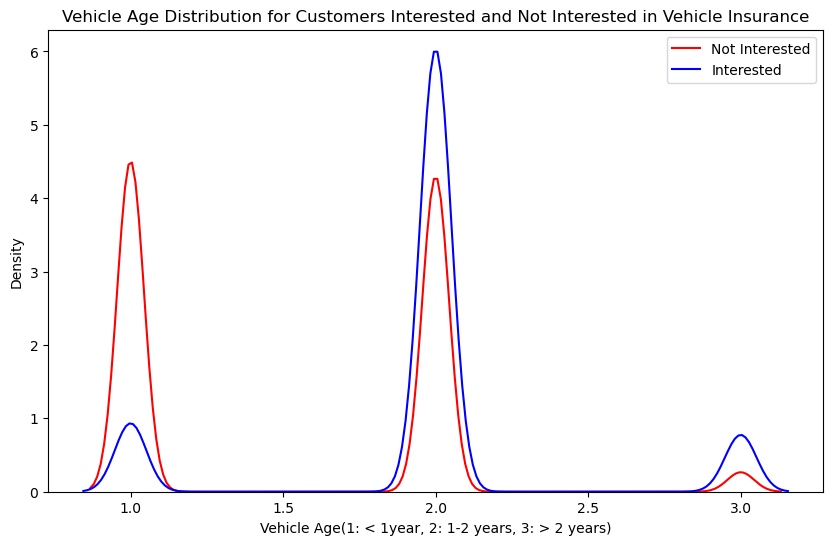

In [56]:
#Distribution of vehicle age for customers who are interested and not interesested in vehicle insurance.
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Response'] == 0]['Vehicle_Age'], color='red', label='Not Interested')
sns.kdeplot(df[df['Response'] == 1]['Vehicle_Age'], color='blue', label='Interested')
plt.xlabel('Vehicle Age(1: < 1year, 2: 1-2 years, 3: > 2 years)')
plt.ylabel('Density')
plt.title('Vehicle Age Distribution for Customers Interested and Not Interested in Vehicle Insurance')
plt.legend()
plt.show()

#Possible Conclusion:
#Customers with vehicles that are 1-2 years old are more interested in vehicle insurance compared to other age groups.